In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [2]:
dftrain = pd.read_csv('../Techwithtim TensorFlow/train.csv') #training data
dfeval = pd.read_csv('../Techwithtim TensorFlow/eval.csv')  # evaluationdata for comparison

ytrain =dftrain.pop('survived') #pops off the survived col of dftrain and stores in ytrain
yeval = dfeval.pop('survived')  #pops off the survived col of dfeval and stores in ytrain

# print(dftrain[0:1]) #to check categorical and numerical columns
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses' ,'parch', 'class','deck','embark_town', 'alone'] #dudes...idk yy he add n_sibs & parch
# CATEGORICAL_COLUMNS = ['sex', 'class', 'deck', 'parch', 'class','deck','embark_town', 'alone']

NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = [] #variable of type list-empty at that...

for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = dftrain[feature_name].unique() #gets a list of all unique vals in each dataframe/feature column
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))
    
for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype = tf.float32))
    
# print(feature_columns)

In [7]:
def make_input_fn(data_df, label_df, num_epochs = 10, shuffle = True, batch_size = 32):
    print(label_df)
    def input_function():#inner function for generation of the return value
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
        if shuffle: #check if true
            ds = ds.shuffle(1000) #shuffle the data like a deck of cards 1000 times
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds
    return input_function



In [9]:
train_input_fn = make_input_fn(dftrain, ytrain)
eval_input_fn = make_input_fn(dfeval, yeval, num_epochs = 1, shuffle = False) #passes our evaluation data...

0      0
1      1
2      1
3      1
4      0
      ..
622    0
623    0
624    1
625    0
626    0
Name: survived, Length: 627, dtype: int64
0      0
1      0
2      1
3      1
4      1
      ..
259    1
260    0
261    0
262    0
263    1
Name: survived, Length: 264, dtype: int64


### Creating our Model: named linear_est

In [10]:
linear_est = tf.estimator.LinearClassifier(feature_columns = feature_columns) #that shit we created earlier--

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\santa\\AppData\\Local\\Temp\\tmp08s1jfap', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### Training the Model

In [18]:
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn) #get model metrics/stats by testing on testing data-- originally returns dict obj

clear_output() #clears console output
print(result['accuracy']) #the key named accuracy in our result dict object to display its corresponding values...

0.7765151


In [19]:
print(result) #ran twice and accuracy is in the 70s

{'accuracy': 0.7765151, 'accuracy_baseline': 0.625, 'auc': 0.8351393, 'auc_precision_recall': 0.7947024, 'average_loss': 0.46858367, 'label/mean': 0.375, 'loss': 0.45590782, 'precision': 0.70408165, 'prediction/mean': 0.38912284, 'recall': 0.6969697, 'global_step': 600}


### Now we will try predict or print an instance of our result

In [22]:
#we will be using the predict method and invoke our input function for the evaluation
predict_result = list(linear_est.predict(eval_input_fn))
print(predict_result)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\santa\AppData\Local\Temp\tmp08s1jfap\model.ckpt-600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[{'logits': array([-2.5378966], dtype=float32), 'logistic': array([0.07324382], dtype=float32), 'probabilities': array([0.9267562 , 0.07324382], dtype=float32), 'class_ids': array([0], dtype=int64), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1]), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([-0.2686478], dtype=float32), 'logistic': array([0.4332391], dtype=float32), 'probabilities': array([0.5667609, 0.4332391], dtype=float32), 'class_ids': array([0], dtype=int64), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1]), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([1.036675], dtype=float32), 'logistic': array([

# Compare results with actual value

In [23]:
#now print the first instance of our list object
print(predict_result[0]) #we will be looking at probabilities--returns the rate at which indl dies or survives respectively

{'logits': array([-2.5378966], dtype=float32), 'logistic': array([0.07324382], dtype=float32), 'probabilities': array([0.9267562 , 0.07324382], dtype=float32), 'class_ids': array([0], dtype=int64), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1]), 'all_classes': array([b'0', b'1'], dtype=object)}


In [31]:
user_instance = 0  #for getting user instance in our dataset
print(predict_result[user_instance]['probabilities'], '\n') #so we see a 92 percent chance that dud didnt survive
print(dfeval.loc[user_instance], '\n') ##get the first instance of our evaluation dataset..
print(yeval[user_instance]) #zero means did not survive, 1 means survived 

[0.9267562  0.07324382] 

sex                          male
age                          35.0
n_siblings_spouses              0
parch                           0
fare                         8.05
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 0, dtype: object 

0


In [32]:
user_instance = 15  #for getting user instance in our dataset
print(predict_result[user_instance]['probabilities'], '\n') #so we see a 92 percent chance that dud didnt survive
print(dfeval.loc[user_instance]) ##get the first instance of our evaluation dataset..
print(yeval[user_instance]) #zero means did not survive, 1 means survived 

[0.5203079  0.47969216] 

sex                        female
age                          16.0
n_siblings_spouses              5
parch                           2
fare                         46.9
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 15, dtype: object
0


In [33]:
user_instance = 105  #for getting user instance in our dataset
print(predict_result[user_instance]['probabilities'], '\n') #so we see a 92 percent chance that dud didnt survive
print(dfeval.loc[user_instance]) ##get the first instance of our evaluation dataset..
print(yeval[user_instance]) #zero means did not survive, 1 means survived 

[0.8178999  0.18210012] 

sex                        male
age                        20.0
n_siblings_spouses            0
parch                         0
fare                     4.0125
class                     Third
deck                    unknown
embark_town           Cherbourg
alone                         y
Name: 105, dtype: object
0


# so 3 instances returned 3 right values, now am scared of overfitting cos dudes own was even wrong i think...a user instance survived but probability for survival was 14 percent...we see just a survival probability cos he returned just that by accessing the element at the index of 1 of the probability array

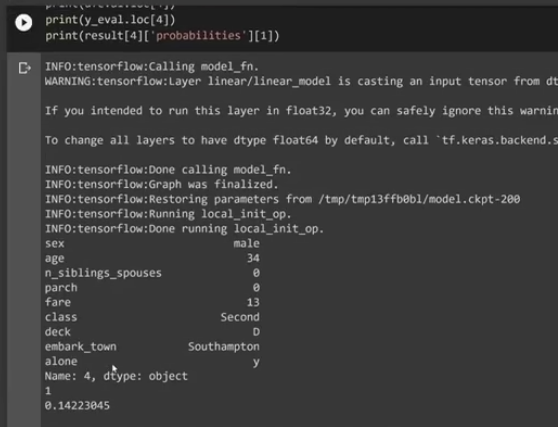

## And this is where dude ended the linear regression demo.. this presents me with the problem of checking for overfitting